# CNS Abstract

In this project I used Princple Component Analysis to examine the degree of separability between modeled neuron electrical recordings and real electrical recordings from actual neurons.

If biologically realistic models were better at imitating real experimental cells, then data and models would not easily be discriminable. By plotting a 48 dimensional feature space onto a two dimensional projection space, I show that a diverse pool of data and models are readily discriminated via Random Forest Classification, a result, that leaves even some of the most optimized models lacking. The idea is that the models which are the most resistant to being correctly machine-classified as models (therefore being misclassified as data), serve as better imitations/mimics of experimental data. I also used random forest regression to investigate when experimental data inform a classifying statistical model which dimensions explain the most of the observed variance in the feature space. Variance-explained will facilitate the production of a list of improvements to make to our models in order to render models better imitations of real data.

In this project you can see use of:
* PCA, t-Distributed Stochastic Neighbor Embedding (t-SNE).
* Random Forest Classification (RFC) using 38 features, and also RFC applied to just 2 features (output from PCA).
* using the RFC "variance-explained" feature. 
* Plotting of a decision boundary.
* Not done yet, but pending Cross-Validation using looping over many different test/train splits.

### Broader Project Context and Background:

There is a great diversity of real biological neurons, all of which differ substantially in their electrical behavior. There are a few different classes of general purpose neuronal models, that can reproduce these different types of electrical behaviours, given appropriate parameterizations of the models.

An exisiting class of neuron model type, called The Izhikevich model was published with parameter sets believed to make the model outputs accurately align with a variety of real biological cell outputs. However since publication much very specific electro physiological recordings have accumulated, that in someways undermine model/experiment agreement. However it is now possible to constrain the Izhikevich model and find new parameterizations that more allow us to more accurately reproduce more recently published experimental data.

In contrast to other projects that seek to use features to seperate and classify two different categories of things that are hard to tell apart, such that humans can benefit from a fast classification of hard to discern differences in high dimensional spaces. In this project the goal is to use resistance to classification as an indicator of an optimization algorithms success, and to use machine seperation of data categories as an error signal, that directs us to precise locations of model failure. Another way of saying this, is, if a good/fair attempt at machine classification is hard, then then a different machine learning algorithm did a good job. If machine classification is very easy, the optimization algorithm did a poor job.

In the figure below you can some different electrical behavior corresponding to two different multi-spiking electrical experiments.
![electrical_behavior.png](electrical_behavior.png)

### Code authorship.
I used the approach described herein for different research work intended for a conference abstract published as follows:
J Birgiolas, R Jarvis, V Haynes, R Gerkin, SM Crook (2019) Automated assessment and comparison of cortical neuron models BMC Neuroscience 2019, 20(Suppl 1):P47 

The application of TSNE to data was developed in a research team context on different data pertaining to ion channels, or the APs exclusively derived from models (as opposed to a combination of models and data). In the context of this project, I have used novel experimental data (pulled from the Allen Brain Portal API) and novel models (8 optimized cell models included), so I have re-applied a small amount of code from pre-established work, but I have made substantial novel contributions, by looking at different features, applying different feature engineering, applying Random Forest Classification, applying variance explained, and interpreting results. For a comparison to other pre-established work that informed this work check [here](https://github.com/vrhaynes/LargeScaleModelAnalysis_2019/blob/master/model-data-clustering.ipynb)

### Model Optimization as a data pre-processing stage.
Before Machine Learning and analysis techniques could be applied, we needed to find optimized models. These optimized models can be understood as models that are intended to be superior mimics of real biologically derived data, as their governing equation parameters have been more rigorously constrained  by a wider range of experimental data.

In order illustrate that the optimized models are better imitations of real data, four adaptive Exponential models, and four Izhikevich models each were fitted to four different classes of experimental cells see implementation in ipython notebook [Notebook](https://github.com/russelljjarvis/neuronunit/blob/master/neuronunit/examples/seperate_out_data_new_models.ipynb). These eight fitted models were subsequently fed into a Druckman feature extraction algorithm, and added as data points in a dimension reduced plot of the feature space. Many pre-existing neural models, and some Allen Brain Data where also plotted as contextual data in the same feature space.

## Project Implementation and Technologies

* Python, pandas sklearn, dask were all used for Model Optimization pre-processing steps, and for plotting the models in a dimension reduced feature space.
* Models versus Data. Models which are resistant to being classified as models are more successful, and better representatives of data. See below.
* The optimized cells were derived from a custom built parallel genetic algorithm, utilizing pre-existing python tools: ***DEAP*** and ***Dask***. It would have been desirable to optimize the models with an algorithm from this course, such as  Lasso, ridge regression, and elastic search (L1+L2)/2 regularization combined. The way I do this is to run a genetic algorithm over the data, The genetic algorithm is performing its own type of guided sparse sampling of the data.

The Druckman feature analysis protocol originates from MATLAB code associated with the analysis of Blue Brain Project Modelled cells, this feature analysis pipeline was then ported to Python by Justas Birgiolas, at a later point I made the feature analysis pipeline applicable to optimized Adaptive Exponential and Izhiketch cells. Rick Gerkin and Vergil Haynes, assisted in data cleaning preperation and TSNE application.



In [1]:
data = []
import plotly
import chart_studio.plotly as py
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn
seaborn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


In [2]:
%%capture
import warnings
#warnings.filter_all("ignore")

import os
#import dask.dataframe as dd    
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(font_scale=1.5)
import pandas as pd
os.getcwd()
from sklearn.preprocessing import StandardScaler
import copy

from neuronunit.optimisation.optimization_management import feature_mine, filtered

# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

# Load optimized reduced cell models


In [3]:
#try:
with open('dm_on_models.p','rb') as f:
    (RAW_dtc,ADEXP_dtc) = pickle.load(f)
    
  

# Run the optimized cells through 3 different third party feature extraction routines.

In [4]:
%%capture 
try:
    #assert 1==2
    useable = pickle.load(open('optimized_multi_feature','rb'))

except:
    useable = []

    for value in RAW_dtc.values():
        dtcpop = value
        dtcpop = [ dtc for dtc in dtcpop if type(dtc.rheobase) is not type(None) ]
        useable.extend(list(map(feature_mine,dtcpop)))

    useable = [ dtc for dtc in dtcpop if hasattr(dtc,'allen_30') ]
    pickle.dump(useable,open('optimized_multi_feature','wb'))



# Collate 3 different feature sets into a unified and aligned data frame.

For five optimized cells

In [5]:
df_o_m2 = None
dict_ = {}

for i,dtc in enumerate(useable):
    dict_.update(**dtc.everything)
    dict_.update(**dtc.dm_results_regular)
    data = pd.DataFrame([dict_])
    if i == 0:
        df_o_m2 = data
    else:
        df_o_m2 = pd.concat([data,df_o_m2])

df_o_m = df_o_m2
df_o_m

,adapt_3.0x,latency_3.0x,isi_cv_3.0x,mean_isi_3.0x,median_isi_3.0x,first_isi_3.0x,avg_rate_3.0x,threshold_index_first_3.0x,clipped_first_3.0x,threshold_t_first_3.0x,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
0,"{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}","{'mean': 0.09304397314265409, 'std': 10.0}",...,None,None,19.5 Hz,9.049999999999955 ms,0.0 ms,56.220000000000255 ms,0.0 ms,49.34500000000003 ms,0.0 ms,0.05208135546591427 megaohm
0,"{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}","{'mean': 0.07516084543288924, 'std': 10.0}",...,None,None,11.0 Hz,13.039999999999964 ms,0.0 ms,45.309999999999945 ms,0.0 ms,57.35500000000002 ms,0.0 ms,0.05208135546591427 megaohm
0,"{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}","{'mean': 0.09234238945911923, 'std': 10.0}",...,17.559999999999945 ms,5.02152,127.0 Hz,8.509999999999991 ms,0.0 ms,14.650000000000091 ms,0.0 ms,6.194999999999936 ms,0.0 ms,0.06451122817679444 megaohm
0,"{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}","{'mean': 0.10942459196404283, 'std': 10.0}",...,85.57999999999993 ms,1.35007,33.5 Hz,8.529999999999973 ms,0.0 ms,21.120000000000005 ms,0.0 ms,22.909999999999968 ms,0.0 ms,0.06451236986770638 megaohm
0,"{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}","{'mean': 0.06892844155158531, 'std': 10.0}",...,94.7999999999995 ms,-5.29523,35.0 Hz,11.610000000000127 ms,0.0 ms,21.190000000000055 ms,0.0 ms,11.944999999999936 ms,0.0 ms,0.02463006373055482 megaohm


In [6]:

    # A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['mean'])
        except:
            print(x)
            raise e
df_o_m = df_o_m.fillna(0)

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
%time df_o_m = df_o_m.fillna(0).applymap(f)



CPU times: user 184 ms, sys: 1.25 ms, total: 185 ms
Wall time: 188 ms


# Finally we have a data frame just for optimized cells

In [7]:
cwd = os.getcwd()
path2data = os.path.join(cwd,'data')

# Load wrangle and clean data 

In [8]:
# Open the 1.5x rheobase file
filename = os.path.join(cwd,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df = pickle.load(f)

    # A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
df = df.fillna(0)

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
%time df = df.fillna(0).applymap(f)
#df_30x = df_30x.fillna(0).applymap(f)
df.head()

df
 

CPU times: user 27.1 s, sys: 309 ms, total: 27.5 s
Wall time: 27.1 s


,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
313861539,81.937500,78.406255,-2.933358,-62.173892,-46.142664,0.016723,73.104168,0.610583,0.543548,66.625000,...,-40.813828,398485.038610,1.992425,-62.822636,384.396994,1.116407,398335.579151,1.991678,-11.120053,0.000270
313861677,97.718750,98.093750,16.759498,-54.223959,-54.843754,-0.075001,97.270835,0.109934,9.866667,83.437504,...,-38.721155,294622.769231,1.473114,-56.141828,337.069923,5.005307,275428.769231,1.377144,1.182692,0.001150
313862167,59.406250,57.343754,20.566763,-58.314641,-56.035212,0.049479,56.880994,0.190261,1.613699,42.781250,...,-39.840803,393670.245283,1.968351,-56.923645,182.445244,1.691332,393169.443396,1.965847,-21.279776,0.000570
313862167,59.406250,57.343754,20.566763,-58.314641,-56.035212,0.049479,56.880994,0.190261,1.613699,42.781250,...,-39.840803,393670.245283,1.968351,-56.923645,182.445244,1.691332,393169.443396,1.965847,-21.279776,0.000570
313862167,59.406250,57.343754,20.566763,-58.314641,-56.035212,0.049479,56.880994,0.190261,1.613699,42.781250,...,-39.840803,393670.245283,1.968351,-56.923645,182.445244,1.691332,393169.443396,1.965847,-21.279776,0.000570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NMLCL001594,110.800480,99.497152,7.884422,-67.300704,-67.316695,-0.025300,107.634615,0.255448,5.538043,91.054451,...,-41.629275,197876.146067,1.978761,-50.215627,189.448764,3.573727,197246.308989,1.972463,-1.280648,0.001215
NMLCL001650,84.876732,84.949020,10.006138,-49.993861,-49.484261,-0.000334,84.803729,0.033616,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NMLCL001657,93.718460,93.535342,1.909754,-54.090244,-54.092049,-0.001995,93.523120,0.077519,16.911111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NMLCL001660,105.456050,106.078701,18.443589,-56.556407,-56.607916,-0.055470,106.129995,0.160918,24.358333,17.179461,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
df.index[42]

313862167

http://celltypes.brain-map.org/experiment/morphology/313862167

In [10]:
df_everything = pd.concat([df,df_o_m])
df_everything

df_everything = df_everything.fillna(0)
df_everything

del df_everything['InputResistanceTest_1.5x']
del df_everything['InputResistanceTest_3.0x']
del df_everything['ohmic_input_resistance_1.5x']
del df_everything['ohmic_input_resistance_3.0x']

del df_o_m['ohmic_input_resistance_1.5x']
del df_o_m['ohmic_input_resistance_3.0x']

del df['InputResistanceTest_1.5x']
del df['InputResistanceTest_3.0x']
del df['ohmic_input_resistance_1.5x']
del df['ohmic_input_resistance_3.0x']

# Declare a dictionary 
Which serves as a table helping us to align Druckman features with high current and low current protocols in other feature sets.

In [11]:

standard = 0
strong = 0
easy_map = [
            {'AP12AmplitudeDropTest':standard},
            {'AP1SSAmplitudeChangeTest':standard},
            {'AP1AmplitudeTest':standard},
            {'AP1WidthHalfHeightTest':standard},
            {'AP1WidthPeakToTroughTest':standard},
            {'AP1RateOfChangePeakToTroughTest':standard},
            {'AP1AHPDepthTest':standard},
            {'AP2AmplitudeTest':standard},
            {'AP2WidthHalfHeightTest':standard},
            {'AP2WidthPeakToTroughTest':standard},
            {'AP2RateOfChangePeakToTroughTest':standard},
            {'AP2AHPDepthTest':standard},
            {'AP12AmplitudeChangePercentTest':standard},
            {'AP12HalfWidthChangePercentTest':standard},
            {'AP12RateOfChangePeakToTroughPercentChangeTest':standard},
            {'AP12AHPDepthPercentChangeTest':standard},
            {'InputResistanceTest':str('ir_currents')},
            {'AP1DelayMeanTest':standard},
            {'AP1DelaySDTest':standard},
            {'AP2DelayMeanTest':standard},
            {'AP2DelaySDTest':standard},
            {'Burst1ISIMeanTest':standard},
            {'Burst1ISISDTest':standard},
            {'InitialAccommodationMeanTest':standard},
            {'SSAccommodationMeanTest':standard},
            {'AccommodationRateToSSTest':standard},
            {'AccommodationAtSSMeanTest':standard},
            {'AccommodationRateMeanAtSSTest':standard},
            {'ISICVTest':standard},
            {'ISIMedianTest':standard},
            {'ISIBurstMeanChangeTest':standard},
            {'SpikeRateStrongStimTest':strong},
            {'AP1DelayMeanStrongStimTest':strong},
            {'AP1DelaySDStrongStimTest':strong},
            {'AP2DelayMeanStrongStimTest':strong},
            {'AP2DelaySDStrongStimTest':strong},
            {'Burst1ISIMeanStrongStimTest':strong},
            {'Burst1ISISDStrongStimTest':strong},
        ]
dm_labels = [list(keys.keys())[0] for keys in easy_map ]

In [12]:

without_new_models = df


In [13]:
df.shape

(7285, 462)

In [14]:
df = df.fillna(0)


Finally we have prepared a pandas data frame, where the first half of the data frame, that is the first ***448*** entries are Druckman measurements pertaining to voltage traces recorded in real biological cells. Appended immediately below in the same data frame we have ***965*** Druckman measurements derived from NeuroML models. A print out of this frame follows.

In [15]:
df
#df.index[42]



,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
313861539,81.937500,78.406255,-2.933358,-62.173892,-46.142664,0.016723,73.104168,0.610583,0.543548,66.625000,...,-40.813828,398485.038610,1.992425,-62.822636,384.396994,1.116407,398335.579151,1.991678,-11.120053,0.000270
313861677,97.718750,98.093750,16.759498,-54.223959,-54.843754,-0.075001,97.270835,0.109934,9.866667,83.437504,...,-38.721155,294622.769231,1.473114,-56.141828,337.069923,5.005307,275428.769231,1.377144,1.182692,0.001150
313862167,59.406250,57.343754,20.566763,-58.314641,-56.035212,0.049479,56.880994,0.190261,1.613699,42.781250,...,-39.840803,393670.245283,1.968351,-56.923645,182.445244,1.691332,393169.443396,1.965847,-21.279776,0.000570
313862167,59.406250,57.343754,20.566763,-58.314641,-56.035212,0.049479,56.880994,0.190261,1.613699,42.781250,...,-39.840803,393670.245283,1.968351,-56.923645,182.445244,1.691332,393169.443396,1.965847,-21.279776,0.000570
313862167,59.406250,57.343754,20.566763,-58.314641,-56.035212,0.049479,56.880994,0.190261,1.613699,42.781250,...,-39.840803,393670.245283,1.968351,-56.923645,182.445244,1.691332,393169.443396,1.965847,-21.279776,0.000570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NMLCL001594,110.800480,99.497152,7.884422,-67.300704,-67.316695,-0.025300,107.634615,0.255448,5.538043,91.054451,...,-41.629275,197876.146067,1.978761,-50.215627,189.448764,3.573727,197246.308989,1.972463,-1.280648,0.001215
NMLCL001650,84.876732,84.949020,10.006138,-49.993861,-49.484261,-0.000334,84.803729,0.033616,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NMLCL001657,93.718460,93.535342,1.909754,-54.090244,-54.092049,-0.001995,93.523120,0.077519,16.911111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NMLCL001660,105.456050,106.078701,18.443589,-56.556407,-56.607916,-0.055470,106.129995,0.160918,24.358333,17.179461,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Identify of the features that explained most variance.


This is a list of the features that explain the most variance.


# delete features 
which were not available or accessible in the real data.
# This 
includes mainly negative current injection protocols such as input resistance etc.

if 'InputResistanceTest_1.5x' in df.columns:
    # in order to find out what is seperating and what is not.
    del df['InputResistanceTest_1.5x']
    del df['InputResistanceTest_3.0x']
    del df['ohmic_input_resistance_1.5x']
    del df['ohmic_input_resistance_3.0x']
    del df['time_1.5x']                              
    #       0.190362
    del df['decay_time_constant_after_stim_3.0x']
    del df['voltage_deflection_3.0x']
    del df['steady_state_hyper_3.0x']
    del df['steady_state_voltage_stimend_3.0x']
    del df['voltage_deflection_vb_ssse_3.0x']
    del df['sag_amplitude_3.0x']
    #0.198310
    del df['is_not_stuck_1.5x']
    del df['AHP_depth_abs_1.5x']
"""

In [16]:
df.tail()

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
NMLCL001594,110.800480,99.497152,7.884422,-67.300704,-67.316695,-0.025300,107.634615,0.255448,5.538043,91.054451,...,-41.629275,197876.146067,1.978761,-50.215627,189.448764,3.573727,197246.308989,1.972463,-1.280648,0.001215
NMLCL001650,84.876732,84.949020,10.006138,-49.993861,-49.484261,-0.000334,84.803729,0.033616,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NMLCL001657,93.718460,93.535342,1.909754,-54.090244,-54.092049,-0.001995,93.523120,0.077519,16.911111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NMLCL001660,105.456050,106.078701,18.443589,-56.556407,-56.607916,-0.055470,106.129995,0.160918,24.358333,17.179461,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NMLCL001663,84.876732,84.949020,10.006138,-49.993861,-49.484261,-0.000334,84.803729,0.033616,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
'''
del df['InputResistanceTest_1.5x']
del df['InputResistanceTest_3.0x']
del df['ohmic_input_resistance_1.5x']
del df['ohmic_input_resistance_3.0x']
'''

"\ndel df['InputResistanceTest_1.5x']\ndel df['InputResistanceTest_3.0x']\ndel df['ohmic_input_resistance_1.5x']\ndel df['ohmic_input_resistance_3.0x']\n"

In [18]:
# Join the dataframes horizonstally, so that all features coming from df_15x get a '_1.5x' suffix
# and all the ones from df_30x get a '_3.0x' suffix
#df = df_15x.join(df_30x, lsuffix='_1.5x', rsuffix='_3.0x')
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
df = df.fillna(0)

In [19]:
print("There are %d models+data and %d features" % df.shape)
#print("There are %d models+data and %d features" % dask_frame.shape)

There are 7285 models+data and 462 features


# The data frame is big.
*lets experiment with dask -lazy pandas array to avoid storing all the data frame in memory all at once.

In [20]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)
df.groupby(df.index).first()
df = pd.DataFrame.drop_duplicates(df)

In [21]:
# Check to see what is there.  Might also check to see if there is data there.
#df_30x#.head()

# make model dataframe

model_idx2 = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
model_no_trans_df2 = df[df.index.isin(model_idx2)]
model_no_trans_df2.index.name = 'OptCells'
model_df2 = model_no_trans_df2.copy()
model_df2.index.name = 'OptCells'
model_df2[:]["type"] = "opt_models"
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'
#model_df[:]["type"] = "regular_models"

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
#experiment_df[:]["type"] = "experimental_data"

#print(len(experiment_df))
model_df2
model_no_trans_df2

experiment = without_new_models[without_new_models.index.isin(experiment_idx)]
#experiment[:]["type"] = "experimental_data"
models = without_new_models[without_new_models.index.isin(model_idx)]
#models[:]["type"] = "models"
#test_frame = copy.copy(sub_df)

In [22]:
#print(len(experiment_df))
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
#experiment_df.index
experiment_df.groupby(experiment_df.index).first()
len(experiment_df)

696

In [23]:
print(len(model_df))
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()
len(model_df)
not_empty = copy.copy(df)
not_empty

965


,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
313861539,0.065233,0.219386,-2.039271,-0.679514,-0.114439,-0.070908,-0.290141,2.347818,-0.889462,-0.108382,...,-0.347344,1.132402,0.294605,-0.683698,1.257711,-1.242429,1.654359,0.791731,-0.623025,-1.213859
313861677,0.968348,0.916649,-0.036468,0.016782,-0.497444,-0.154438,1.105349,-0.400364,1.214151,0.924870,...,-0.145324,0.454335,-0.624019,-0.203222,0.798353,2.001353,0.659566,-0.464265,0.987169,0.841347
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NMLCL001542,0.120900,0.439023,0.031907,-1.265364,-1.118008,-0.497253,0.708408,1.331633,2.787950,0.770845,...,-1.496138,-0.077145,0.541746,-0.576678,2.672859,4.283515,0.149739,1.062984,-1.918784,0.083329
NMLCL001594,1.716977,0.966353,-0.939081,-1.128547,-1.046479,-0.109177,1.703799,0.398396,0.237466,1.392988,...,-0.426064,-0.177277,0.270435,0.222983,-0.634462,0.807253,0.026766,0.752460,0.664765,0.992282
NMLCL001650,0.233437,0.451108,-0.723298,0.387275,-0.261530,-0.086441,0.385443,-0.819293,-0.989542,-4.202980,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL001657,0.739423,0.755206,-1.546716,0.028493,-0.464356,-0.087955,0.888939,-0.578298,2.803619,-4.202980,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961


# Select out models,
that we know are _intended_ to be highly representative of the data.
These cells models are by author Gouwens


In [24]:
with open('gouwens.p','rb') as f:
    gouwens = pickle.load(f)
gwn_check = list(gouwens.values())
gwindex = gwn_check[0][0]
gouwens_idx = [idx for idx in df.index.values if idx in gwindex]
gouwens_idx_labels = [i for i in gouwens_idx]
gouwens_idx_labels = df.index.isin(gouwens_idx)
gouwens_cells = df[df.index.isin(gouwens_idx)]
#gouwens_cells

#gouwens_cells[gouwens_idx_labels[-7]]
unusual = df[df.index.isin(gouwens_idx)]
unusual
print(gouwens_cells.index[-7],'a Gouwens model that well represents data')
gouwens_cells

NMLCL001501 a Gouwens model that well represents data


,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
NMLCL001432,-1.783717,-0.891054,0.391485,-1.190299,-0.866419,-0.108939,-0.738259,1.526802,-0.694075,0.056806,...,-1.557667,-0.712301,-1.179233,-0.758288,0.149814,-0.577170,-0.699054,-1.080339,-2.426502,-1.011790
NMLCL001435,1.272690,1.116226,-0.376130,-1.593063,-1.278130,-0.007210,1.303159,-0.507463,1.091306,0.844746,...,-1.220398,-0.159870,0.317600,-1.231851,1.610890,2.842470,0.044087,0.796197,0.249771,0.628269
NMLCL001440,0.453536,-0.040075,0.842266,-1.148001,-1.049278,-0.012397,-0.578058,0.324642,0.030324,2.254095,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL001443,0.672300,0.661025,1.208567,-0.891071,-0.871964,-0.093778,0.550781,-0.497081,-0.450354,0.623763,...,-1.001068,-0.195646,0.220663,-0.772408,1.038192,1.040329,0.005123,0.697808,-0.112931,-0.082714
NMLCL001448,-1.110716,-0.312133,-0.153102,-0.658655,-0.794943,-0.471615,-0.847778,1.311674,4.178004,-4.202980,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL001459,1.074369,-2.557493,-3.315261,-4.323587,1.916672,-0.086137,1.238193,-1.003821,6.636892,-1.122047,...,-1.605444,0.519870,2.159382,-3.467482,1.038869,0.007294,-0.756659,-1.225800,-2.128037,-0.279060
NMLCL001467,-0.334770,0.517309,-0.042834,-1.322273,-1.151534,-0.235513,0.261367,1.055099,3.072423,-0.005905,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL001470,0.929144,0.648706,-0.104672,-1.281845,-1.122581,-0.059442,0.605078,0.597078,1.035524,0.645399,...,-1.119761,-0.470735,-0.524700,-0.786900,0.523121,2.130731,-0.348794,-0.195884,0.047337,0.652404
NMLCL001476,-0.207642,0.112713,-0.197716,-1.970628,-1.042464,-0.082518,-0.333349,1.622370,-0.674854,1.262522,...,-1.706910,-0.159189,0.319445,-1.474279,0.207420,-0.474075,0.053016,0.818743,-2.004740,-0.728543
NMLCL001484,-0.956830,-0.301170,-0.359114,-1.693755,-1.181114,-0.222086,-0.725295,0.429569,-0.197610,-1.505621,...,-1.602522,-0.152968,0.336301,-1.443029,-0.069468,-0.336933,0.060003,0.836388,-2.203303,-0.565414


In [25]:
with open('markram.p','rb') as f:
    markram = pickle.load(f)
markram_check = list(markram.values())
markramindex = markram_check[0][0]
markram_idx = [idx for idx in df.index.values if idx in markramindex]
markram_idx_labels = [i for i in markram_idx]
markram_idx_labels = df.index.isin(markram_idx)
markram_cells = df[df.index.isin(markram_idx)]
#gouwens_cells

#gouwens_cells[gouwens_idx_labels[-7]]
#unusual = df[df.index.isin(markram_idx)]
#unusual
#print(gouwens_cells.index[-7],'a Gouwens model that well represents data')
markram_cells



,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
NMLCL000091,1.435596,1.109388,-2.386871,-2.377715,-1.651992,-0.066001,1.500107,-0.897216,-0.172245,0.716797,...,-1.790786,-0.255874,0.057472,-1.970425,1.432651,-0.134635,-0.075367,0.494560,0.617983,-0.263956
NMLCL000123,1.155010,0.625892,-2.028297,-1.791511,-1.255917,0.397882,0.065030,-0.817926,-0.457421,0.723994,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL000187,0.852138,0.858288,-2.253596,-2.010926,-1.421386,-0.010129,1.010341,-0.813191,-0.378594,0.264221,...,-1.754021,-0.244019,0.089596,-1.678691,0.753559,-0.185001,-0.055816,0.543927,0.195337,-0.258636
NMLCL000219,1.022138,0.457121,-1.670874,-1.808056,-1.220151,0.725407,0.192480,-0.913328,-0.474344,0.517827,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL000283,0.305833,0.496341,-2.113352,-1.798923,-1.360288,-0.053901,0.296130,-0.641050,-0.133937,-0.145905,...,-1.539416,-0.173866,0.279677,-1.409064,-0.698437,-0.268957,0.032772,0.767625,-0.273754,0.384966
NMLCL000293,0.723530,0.810438,-2.526643,-2.201065,-1.549586,-0.091225,0.887216,-0.775871,-0.181490,0.121171,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL000325,-1.275876,-0.485599,-0.943668,-0.652692,-0.806830,-0.088381,-1.204586,-0.534241,0.940224,-1.089190,...,-1.596860,-0.208919,0.184700,-0.503085,-1.523302,0.244843,-0.016152,0.644085,-4.717320,1.422178
NMLCL000389,0.251924,0.487755,-2.124324,-1.735227,-1.262544,-0.073385,0.348460,-0.680215,-0.380330,-0.233292,...,-1.462550,-0.199894,0.209152,-1.415449,-0.668695,-0.449086,0.000489,0.686105,-0.121488,0.158150
NMLCL000559,0.615849,0.557839,-1.376368,-0.981344,-0.894105,-0.081146,0.731391,-0.759863,-0.397584,0.771806,...,-1.644730,-0.233568,0.117912,-0.866218,1.235143,0.628284,-0.046804,0.566686,0.738183,-0.091677
NMLCL000623,1.551721,1.229750,-2.123715,-1.738680,-1.170497,-0.084729,1.618566,-0.755783,-0.530310,1.178995,...,-1.439773,-0.241217,0.097186,-1.465128,1.851472,0.399692,-0.052940,0.551192,0.995913,-0.145188


Primary visual area layer 4 spiny 479728896 Cell
https://neuroml-db.org/model_info?model_id=NMLCL001508

# In the cells below.
I use PCA as a heuristic aid, to facilitate human intuition about Machine classification of data versus models.

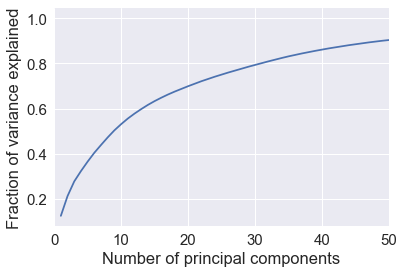

In [26]:
# Do PCA and look at variance explained
fig = plt.figure()

pca = PCA()
pca.fit(df.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [27]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)


# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
model_no_trans_df = df[~df.index.isin(experiment_idx)]
experiment_idx_labels = [(i,idx) for i,idx in enumerate(df.index.values) if type(idx)==int]

#model_df
#df.labels
model_no_trans_df
experiment_idx_labels = [i[0] for i in experiment_idx_labels]
experiment_idx_labels
model_no_trans_df
model_index_labels = ~df.index.isin(experiment_idx)

model_index_labels


new_models_idx = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
new_model_labels= df.index.isin(new_models_idx)
#len(new_models_idx)
nm = df.head(7)
nm

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
313861539,0.065233,0.219386,-2.039271,-0.679514,-0.114439,-0.070908,-0.290141,2.347818,-0.889462,-0.108382,...,-0.347344,1.132402,0.294605,-0.683698,1.257711,-1.242429,1.654359,0.791731,-0.623025,-1.213859
313861677,0.968348,0.916649,-0.036468,0.016782,-0.497444,-0.154438,1.105349,-0.400364,1.214151,0.924870,...,-0.145324,0.454335,-0.624019,-0.203222,0.798353,2.001353,0.659566,-0.464265,0.987169,0.841347
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579


# The Dimensionality reduction assists human visual system classification

It is possible for the human visual system to see three clusters of cell data points.

Let's show that we can classify in this low dimensional space (by just using two features). We will slowly build up to classification via first applying Kmeans, to visualize cluster centres.
And then move on to using a random forest approach to actually visualizing decision boundaries.

In [28]:

isomap = Isomap(n_components=2)
isomap.fit(df.values)
iso = isomap.embedding_.T

# In the slide below:
You can see a plot of the high dimensional Druckman feature space projected into a low dimensional space using rotation matrices found via 
a regular PCA algorithm (not T distributed stochastic neighbourhood embedding). 

PCA uses rotated covariance matrices to project original data into the directions where variance in the data is maximum. One disadvantage of this approach is that two of the highest weighted eigenvalues yield synthetic dimensions, synthetic dimensions that are hard to relate back to a just a few of the original Druckman dimensions. 

In this way PCA and TSNE are useful data exploration tools, by the may not always lead to a complete understanding of the data.

In order to circumvent this problem we will use the variance-explained feature of "Random Forest" classification algorithm. Random Forest variance explained, will probably hint at which dimensions comprize the greatest eigenvalues/weights of the PCA algorithm.

array([ -16.81948045,  -73.46886457, -103.67226348,  -49.61645033,
        -99.72229568,   -7.01603124,  -75.03259086,  -44.73405211,
        -32.77900307,  -19.23029797,  -49.17811154,  -35.81108091,
        113.50586032,  -12.85053529,  -53.44327107,  -56.36969773,
        -17.20007115,  -28.62005796])

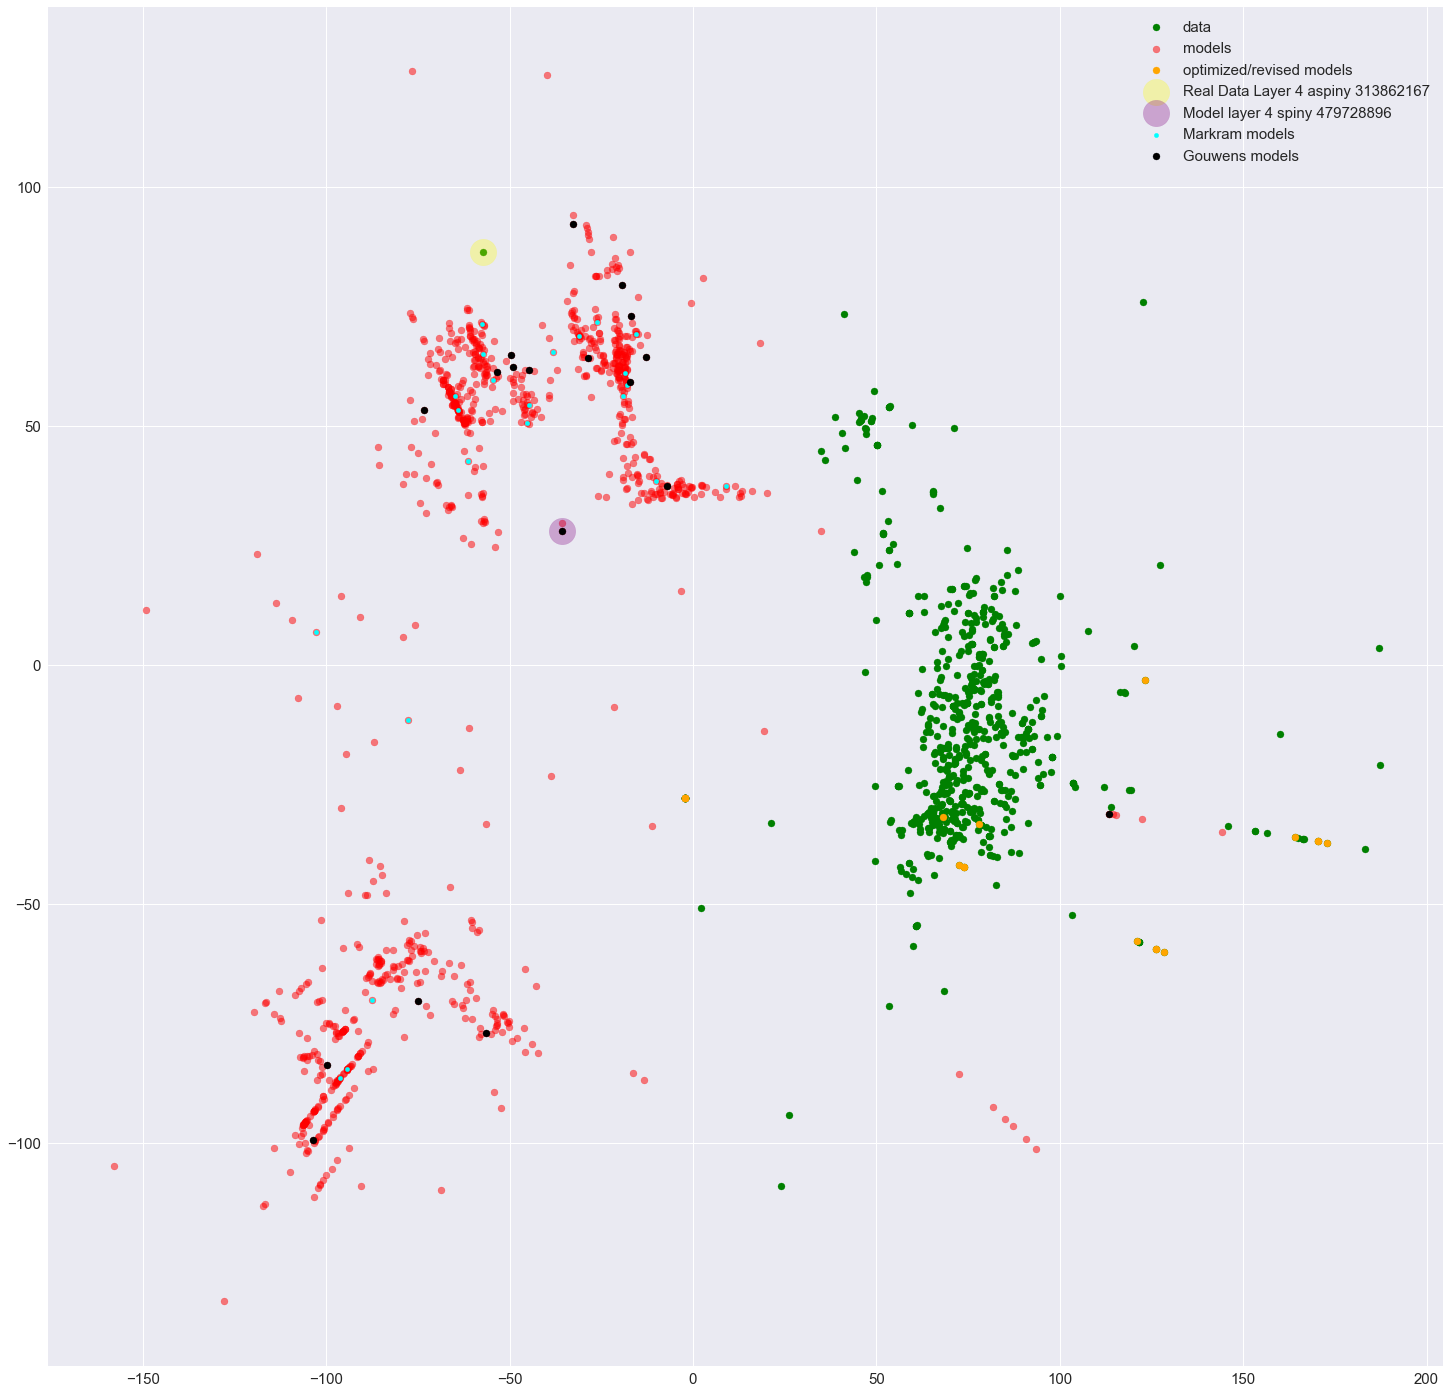

In [29]:
import matplotlib.pyplot as plt
# Do an isomap embedding in 2 dimensions
# Plot that isomap embedding. Each is a model (or a cell, for data)
#plt.scatter(iso);
#plt.clf()
fig, ax = plt.subplots(figsize=(25, 25))


plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='green',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],alpha=0.5,c='red',cmap='rainbow',label='models')
plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='orange',cmap='rainbow',label='optimized/revised models')

plt.scatter(iso[0,experiment_idx_labels][42],iso[1,experiment_idx_labels][42],s=700,c='yellow', alpha=0.3,cmap='rainbow',label='Real Data Layer 4 aspiny 313862167')
plt.scatter(iso[0,gouwens_idx_labels][-7],iso[1,gouwens_idx_labels][-7],s=700,c='purple', alpha=0.3,cmap='rainbow',label='Model layer 4 spiny 479728896')
plt.scatter(iso[0,markram_idx_labels],iso[1,markram_idx_labels],s=20,c='cyan',cmap='rainbow',label='Markram models')


plt.scatter(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],c='black',cmap='rainbow',label='Gouwens models')

legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")
# I don't love the isomap fit
#gouwens_idx_labels
gouwens_idx_labels
new_model_labels
iso[0,gouwens_idx_labels]

In [30]:
#print(iso[0,gouwens_idx_labels[-7]])
#print(iso[1,gouwens_idx_labels[-7]])
print(iso[1,gouwens_idx_labels][-7])
print(iso[0,gouwens_idx_labels][-7])

27.92871343552477
-35.81108090707699


In [31]:
print(iso[1,gouwens_idx_labels][-7])

27.92871343552477


In [32]:
#print([(i,j) for i,j in enumerate(iso[0,experiment_idx_labels]) if j>50 and j<60] )
#print([(i,j) for i,j in enumerate(iso[0,experiment_idx_labels]) if j< -100 ] )


In [33]:
print(iso[0,experiment_idx_labels][42],iso[1,experiment_idx_labels][42])

-57.3657429440201 86.38118246935994


In [34]:
#print(iso[0,experiment_idx_labels]);


In [35]:
print(model_index_labels)

[False False False ...  True  True  True]


In [36]:
#experiment_idx_labels

#df[df.index.isin(new_model_idx)]

In [37]:

from sklearn.cluster import KMeans
est = KMeans(n_clusters=3)
est.fit(iso.T)
y_kmeans = est.predict(iso.T)
centers = est.cluster_centers_


In [38]:
#plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='orange',cmap='rainbow',label='optimized/revised models')


Another plot but with Kmeans cluster centers included.
Showing the cluster centres is a first step towards showing that machine classification on the dimension reduced version of the Druckman data feature space.

In the plot below the two large yellow dots are the cluster centres for ***(left models),*** ***(right data)***. The Euclidian distnace from each data point from a cluster centre is directly proportional too which category the data point is from (ie model or data, ie red/blue). This visualization would assist us to understand using KMeans nearist neighbours classification algorithm to classify the data.


IN a Random Forest Classification Analysis performed much further below we  examine the dimension that contributes the most to cluster seperation by looking at variance explained. This gives us an educated guess about dimensions that contribute the most weight to the axis of the PCA projection spaces plotted above.

It is likely that the axis in the PCA plot below, are strongly aligned with "Input Resistance" in models and data, as well as "AP2RateOfChangePeakToTroughTest". This second dimension means considering multi-spiking waveforms observed in models and data, at the second Action Potential/Spike, how rapid is the decay from peak to trough of the second AP wave.

<Figure size 432x288 with 0 Axes>

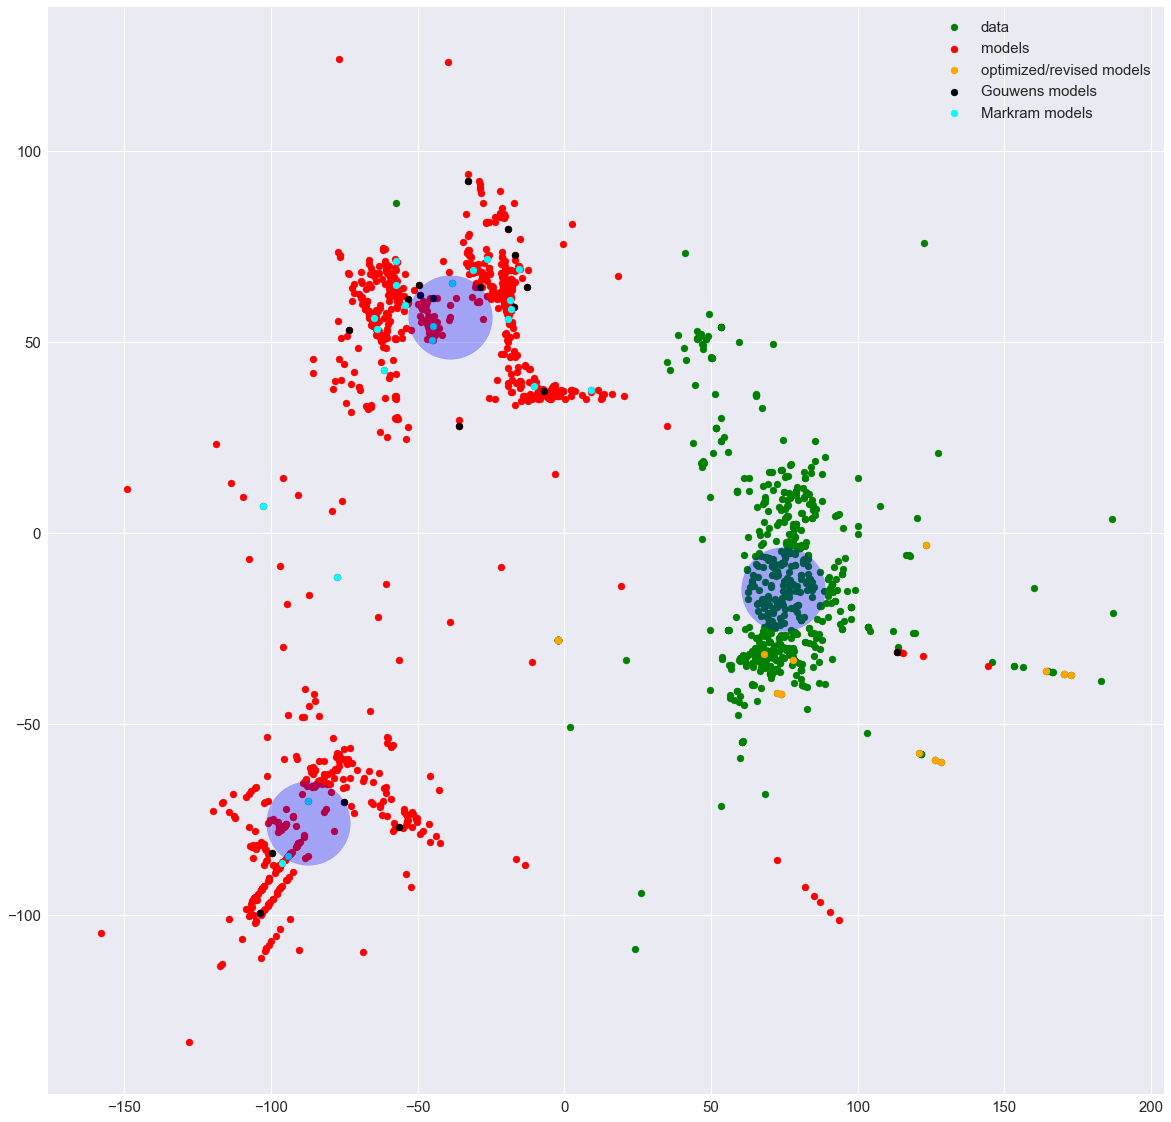

In [39]:

plt.clf()
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111)

plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='green',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='orange',cmap='rainbow',label='optimized/revised models')
plt.scatter(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],c='black',cmap='rainbow',label='Gouwens models')
plt.scatter(iso[0,markram_idx_labels],iso[1,markram_idx_labels],c='cyan',cmap='rainbow',label='Markram models')

plt.scatter(centers[0][0],centers[0][1],s=7000,c='blue', alpha=0.3, edgecolors='blue')#,label='cluster 1')
plt.scatter(centers[1][0],centers[1][1],s=7000,c='blue', alpha=0.3,edgecolors='blue')#,label='cluster 2')
plt.scatter(centers[2][0],centers[2][1],s=7000,c='blue', alpha=0.3,edgecolors='blue')#,label='cluster 3')
legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")


In [40]:
import plotly.express as px
import plotly.graph_objects as go

data = []
trace0=(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],'data',experiment_idx)
trace1=(iso[0,model_index_labels],iso[1,model_index_labels],'models',model_idx)
trace2=(iso[0,new_model_labels],iso[1,new_model_labels],'optimized models',new_models_idx)
trace3=(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],'Gouwens models',gouwens_idx)
trace4=(iso[0,markram_idx_labels],iso[1,markram_idx_labels],'Markram models',markram_idx)

trace5=([iso[0,experiment_idx_labels][42]],[iso[1,experiment_idx_labels]],'Layer 4 aspiny 313862167',experiment_idx_labels)
trace6=([iso[0,gouwens_idx_labels][-7]],[iso[1,gouwens_idx_labels][-7]],'Layer 4 spiny 479728896',gouwens_idx_labels)

traces = [trace0,trace1,trace2,trace3,trace4,trace5,trace6]
cnt=0
theme = px.colors.diverging.Portland

for i,ttt in enumerate(traces):
    if cnt==len(theme):
        cnt=0
    if i>1:
        size = 12
    else:
        size = 6
    trace = dict(
        type='scatter',
        text = df[df.index.isin(ttt[3])].index,
        x=ttt[0],
        y=ttt[1],
        mode='markers',
        name=ttt[2],
        marker=dict(
            color=theme[cnt],
            size=size,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)
    cnt+=1



fig = go.Figure(
    data=data,
    layout_title_text="steady_state_voltage_stimend_3.0x versus AP1DelayMeanTest_3.0x"
)#,

fig.update_layout(
    autosize=False,
    width=1050,
    height=1050
)


fig.show()


In [41]:
# Do a TSNE embedding in two dimensions

tsne = TSNE(n_components=2, perplexity=30)
tsne.fit(df.values)
x = tsne.embedding_.T
#np.shape(x)
#print(experiment_idx)
# Plot that TSNE embedding. Each is a model (or a cell, for data)

"""
plt.clf()
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111)
plt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(x[0,model_index_labels],x[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(x[0,new_model_labels],x[1,new_model_labels],c='green',cmap='rainbow',label='optimized models')
plt.scatter(x[0,gouwens_idx_labels],x[1,gouwens_idx_labels],c='black',cmap='rainbow',label='Gouwens models')
plt.scatter(x[0,markram_idx_labels],x[1,markram_idx_labels],c='orange',s=100, cmap='rainbow',label='Markram models')

plt.scatter(x[0,experiment_idx_labels][42],x[1,experiment_idx_labels][42],s=700,c='purple', alpha=0.3,cmap='rainbow',label='Layer 4 aspiny 313862167')
plt.scatter(x[0,gouwens_idx_labels][-7],x[1,gouwens_idx_labels][-7],s=700,c='purple', alpha=0.3,cmap='rainbow',label=' layer 4 spiny 479728896')
#except:
#    pass
legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")
"""

'\nplt.clf()\nfig = plt.figure(figsize=(20,20))\nax = plt.subplot(111)\nplt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c=\'blue\',cmap=\'rainbow\',label=\'data\')\nplt.scatter(x[0,model_index_labels],x[1,model_index_labels],c=\'red\',cmap=\'rainbow\',label=\'models\')\nplt.scatter(x[0,new_model_labels],x[1,new_model_labels],c=\'green\',cmap=\'rainbow\',label=\'optimized models\')\nplt.scatter(x[0,gouwens_idx_labels],x[1,gouwens_idx_labels],c=\'black\',cmap=\'rainbow\',label=\'Gouwens models\')\nplt.scatter(x[0,markram_idx_labels],x[1,markram_idx_labels],c=\'orange\',s=100, cmap=\'rainbow\',label=\'Markram models\')\n\nplt.scatter(x[0,experiment_idx_labels][42],x[1,experiment_idx_labels][42],s=700,c=\'purple\', alpha=0.3,cmap=\'rainbow\',label=\'Layer 4 aspiny 313862167\')\nplt.scatter(x[0,gouwens_idx_labels][-7],x[1,gouwens_idx_labels][-7],s=700,c=\'purple\', alpha=0.3,cmap=\'rainbow\',label=\' layer 4 spiny 479728896\')\n#except:\n#    pass\nlegend = ax.legend()#han

In [42]:
import plotly.express as px
import plotly.graph_objects as go

data = []
trace0=(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],'data',experiment_idx)
trace1=(iso[0,model_index_labels],iso[1,model_index_labels],'models',model_idx)
trace2=(iso[0,new_model_labels],iso[1,new_model_labels],'optimized models',new_models_idx)
trace3=(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],'Gouwens models',gouwens_idx)
trace4=(iso[0,markram_idx_labels],iso[1,markram_idx_labels],'Markram models',markram_idx)

trace5=([iso[0,experiment_idx_labels][42]],[iso[1,experiment_idx_labels]],'Layer 4 aspiny 313862167',experiment_idx_labels)
trace6=([iso[0,gouwens_idx_labels][-7]],[iso[1,gouwens_idx_labels][-7]],'Layer 4 spiny 479728896',gouwens_idx_labels)
traces = [trace0,trace1,trace2,trace3,trace4,trace5,trace6]
cnt=0
theme = px.colors.diverging.Portland
for i,ttt in enumerate(traces):
    if cnt==len(theme):
        cnt=0
    if i>1:
        size = 12
    else:
        size = 6
    trace = dict(
        type='scatter',
        text = df[df.index.isin(ttt[3])].index,
        x=ttt[0],
        y=ttt[1],
        mode='markers',
        name=ttt[2],
        marker=dict(
            color=theme[cnt],
            size=size,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)
    cnt+=1



fig = go.Figure(
    data=data,
    layout_title_text="steady_state_voltage_stimend_3.0x versus AP1DelayMeanTest_3.0x"
)

#layout = {'scene': {'xaxis': {'showspikes': False}}}
fig.update_layout(
    autosize=False,
    width=1050,
    height=1050
)


fig.show()


### t-SNE 
The TSNE plot does a better job of spatially sperating experimental data from theoretical models in dimension reduced Druckman feature space.




In [43]:
new_model_labels

array([ True,  True,  True, ..., False, False, False])

*Finally we  examine the dimension that contributes the most to cluster seperation by looking at variance explained. This gives us an educated guess about dimensions that contribute the most weight to the axis of the PCA projection spaces plotted above.


In [44]:

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

df_models = df[~df.index.isin(experiment_idx)]
df_data = df[df.index.isin(experiment_idx)]
# Assume they have the same columns

df_combined = pd.concat([df_data, df_models])

groundtruth = np.array(df.index.isin(experiment_idx))
rfc = RandomForestClassifier()
X = df_combined.values
rfc.fit(X, groundtruth)

importances = pd.Series(index = df_combined.columns, data=rfc.feature_importances_)
groundtruth[-9:-1]

print(importances.sort_values(ascending=False)[0:9])


AP2_begin_voltage_1.5x                  0.177134
voltage_deflection_3.0x                 0.106929
steady_state_voltage_stimend_3.0x       0.099251
sag_amplitude_3.0x                      0.095624
AHP_depth_abs_slow_1.5x                 0.085856
AP1DelayMeanTest_1.5x                   0.085590
AP2RateOfChangePeakToTroughTest_3.0x    0.084153
AP2AHPDepthTest_3.0x                    0.083858
AccommodationRateToSSTest_3.0x          0.046378
dtype: float64


In [45]:
print('InputResistanceTest_3.0x' in df_data.columns)
print('InputResistanceTest_3.0x' in df_models.columns)
print('InputResistanceTest_3.0x' in df_combined)



False
False
False


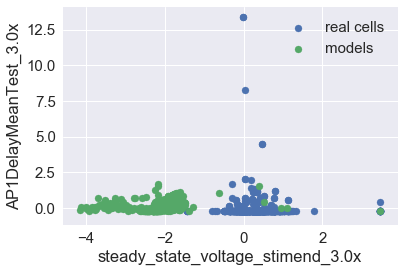

In [46]:
#plt.histogram()
#plt.histogram()
plt.clf()
plt.scatter(df_data['steady_state_voltage_stimend_3.0x'], df_data['AP1DelayMeanTest_3.0x'],label='real cells')
plt.scatter(df_models['steady_state_voltage_stimend_3.0x'], df_models['AP1DelayMeanTest_3.0x'],label='models')
#plt.scatter(df_o_m['steady_state_voltage_stimend_3.0x'], df_o_m['AP1DelayMeanTest_3.0x'],label='models')

plt.xlabel('steady_state_voltage_stimend_3.0x')
plt.ylabel('AP1DelayMeanTest_3.0x')
plt.legend()
plt.show()


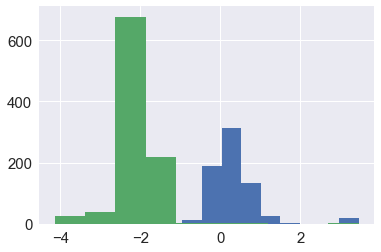

In [47]:
plt.clf()
plt.hist(df_data['steady_state_voltage_stimend_3.0x'])
plt.hist(df_models['steady_state_voltage_stimend_3.0x'])
plt.show()

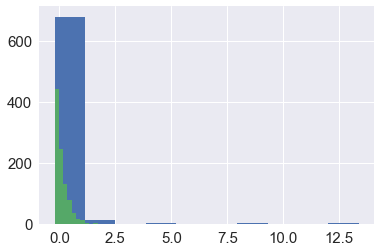

In [48]:
plt.clf()
plt.hist(df_data['AP1DelayMeanTest_3.0x'])
plt.hist(df_models['AP1DelayMeanTest_3.0x'])
plt.show()

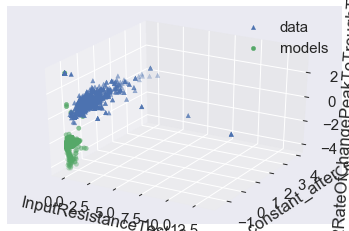

AP1DelayMeanTest
False


In [49]:
'decay_time_constant_after_stim_3.0x' in df_data.columns

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#fig = plt.figure()
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#plt.clf()
ax.scatter(df_data['AP1DelayMeanTest_3.0x'], df_data['decay_time_constant_after_stim_3.0x'], df_data['steady_state_voltage_stimend_3.0x'],marker='^',label='data')
ax.scatter(df_models['AP1DelayMeanTest_3.0x'], df_models['decay_time_constant_after_stim_3.0x'], df_models['steady_state_voltage_stimend_3.0x'],marker='o',label='models')
#ax.scatter(df_o_m['AP1DelayMeanTest_3.0x'], df_o_m['decay_time_constant_after_stim_3.0x'], df_o_m['steady_state_voltage_stimend_3.0x'],marker='o')

#, marker=m)
ax.set_xlabel('InputResistanceTest_3.0x')
ax.set_ylabel('decay_time_constant_after_stim_3.0xl')
ax.set_zlabel('AP2RateOfChangePeakToTroughTest_3.0x')
#plt.scatter(df_combined['InputResistanceTest_3.0x'],df_combined['decay_time_constant_after_stim_3.0x'])
plt.legend()
plt.show()

for c in df_o_m.columns:
    if 'AP1DelayMeanTest' in c:
        print(c)

print('AP1DelayMeanTest_3.0x' in df_o_m.columns)

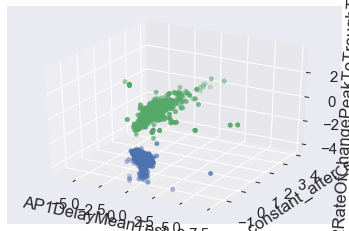

In [50]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#fig = plt.figure()
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#plt.clf()
ax.scatter(df_models['AP2AHPDepthTest_1.5x'], df_models['decay_time_constant_after_stim_3.0x'], df_models['steady_state_voltage_stimend_3.0x'])
ax.scatter(df_data['AP2AHPDepthTest_1.5x'], df_data['decay_time_constant_after_stim_3.0x'], df_data['steady_state_voltage_stimend_3.0x'])
#ax.scatter(df_o_m['AP2AHPDepthTest_1.5x'], df_o_m['decay_time_constant_after_stim_3.0x'], df_o_m['steady_state_voltage_stimend_3.0x'])

#, marker=m)
ax.set_xlabel('AP1DelayMeanTest_3.0x')
ax.set_ylabel('decay_time_constant_after_stim_3.0xl')
ax.set_zlabel('AP2RateOfChangePeakToTroughTest_3.0x')
#plt.scatter(df_combined['InputResistanceTest_3.0x'],df_combined['decay_time_constant_after_stim_3.0x'])
plt.show()



In [51]:
'''
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

#fig = plt.figure()
fig = plt.figure(figsize=(22,22),dpi=90)

ax = fig.add_subplot(111, projection='3d')
#plt.clf()
ax.scatter( df_models['decay_time_constant_after_stim_3.0x'],df_models['AP1DelayMeanTest_3.0x'], df_models['AP2RateOfChangePeakToTroughTest_3.0x'])
#, marker=m)
ax.set_xlabel('AP1DelayMeanTest_3.0x')
ax.set_ylabel('decay_time_constant_after_stim_3.0xl')
ax.set_zlabel('AP2RateOfChangePeakToTroughTest_3.0x')
#plt.scatter(df_combined['InputResistanceTest_3.0x'],df_combined['decay_time_constant_after_stim_3.0x'])
plt.show()
'''

"\nfrom mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import\n\n#fig = plt.figure()\nfig = plt.figure(figsize=(22,22),dpi=90)\n\nax = fig.add_subplot(111, projection='3d')\n#plt.clf()\nax.scatter( df_models['decay_time_constant_after_stim_3.0x'],df_models['AP1DelayMeanTest_3.0x'], df_models['AP2RateOfChangePeakToTroughTest_3.0x'])\n#, marker=m)\nax.set_xlabel('AP1DelayMeanTest_3.0x')\nax.set_ylabel('decay_time_constant_after_stim_3.0xl')\nax.set_zlabel('AP2RateOfChangePeakToTroughTest_3.0x')\n#plt.scatter(df_combined['InputResistanceTest_3.0x'],df_combined['decay_time_constant_after_stim_3.0x'])\nplt.show()\n"

In [52]:
print(len(df_data))
print(len(df_models))


696
965


In [53]:
predictions = rfc.predict(X)
for i,j in zip(predictions,groundtruth):
    if i!=j:
        print(i,j)
        
groundtruth   

array([ True,  True,  True, ..., False, False, False])

As I wrote above Random Forest Variance explained, tells us the dimensions of the Druckman feature space that most strongly assist in classifying models versus data. When we identify features that seperate models and data using Variance Explained, we are then able to iteratively variables that contribute more heavily to data variance. We can remove variables that explain most variance, until machine classification can no longer tell models and data apart, leaving us with a small list of tests which models need to perform better on, these tests correspond to measurable electrical properties of cells that need to be better aligned with data.

Two such measurable electrical properties are Druckman features with high variance explained are re: "Input Resistance" in models and data, as well as "AP2RateOfChangePeakToTroughTest". This second dimension called AP2RateOfChangePeakToTroughTest means: when considering multi-spiking waveforms observed, at the second Action Potential/Spike, how rapid is the average decay from peak to trough of the second AP wave. Since Action Potential wave attack and decay shapes are non-linear, the instantaneous gradient from the peak of the wave is not informative, and it is more useful to measure the time interval needed needed for a decay from a spike, to a state of hyperpolarization, corresponding to a neurons "refractory-period".

Already, we are have arrived at useful information, pertaining to the point of the exercise, as we now have a small list of electrical tests, that we want optimized models to perform better on, such that models and data will be more aligned with each other.

As neural modelers with a great interest in mimicing a diverse range of experimental data using models. The least convincing aspects of our models as mimics of data, are these top ten features. In other words the least convincing aspects of our models are: AP2RateOfChangePeakToTroughTest, Input Resistance values (a scalar), and the amplitude of the first and second spike.





# Prediction Results When I Use Random Forests on all 48 Druckman dimensions
* remember that our ground truth labels are booleans that are defined like this:
groundtruth = np.array(df_combined.index.isin(experiment_idx))
Which is labeled as "True" for this data point is an experiment, and "False" for this data point is a model.
Machine classification can successfuly discrimate that our optimized cells are models and not data (this is bad news for us).

In this context in order to bolster out optimized models, a high ***false-negative*** rate is desirable. Unfortunately for us, that is not what we see. The Random Forest Classifier (RFC) correctly identies that all 11 of the new optimized cells are not derived from experiments (they are models). That is bad news for us.


# Before

In [54]:
print(len(df_o_m.columns))
print(len(df_combined.columns))

df_combined.columns

550
462


Index(['AHP1_depth_from_peak_1.5x', 'AHP2_depth_from_peak_1.5x',
       'AHP_depth_1.5x', 'AHP_depth_abs_1.5x', 'AHP_depth_abs_slow_1.5x',
       'AHP_depth_diff_1.5x', 'AHP_depth_from_peak_1.5x', 'AHP_slow_time_1.5x',
       'AHP_time_from_peak_1.5x', 'AP1_amp_1.5x',
       ...
       'threshold_v_3.0x', 'trough_index_3.0x', 'trough_t_3.0x',
       'trough_v_3.0x', 'upstroke_3.0x', 'upstroke_downstroke_ratio_3.0x',
       'upstroke_index_3.0x', 'upstroke_t_3.0x', 'upstroke_v_3.0x',
       'width_3.0x'],
      dtype='object', length=462)

In [55]:
df_o_m.columns


Index(['adapt_3.0x', 'latency_3.0x', 'isi_cv_3.0x', 'mean_isi_3.0x',
       'median_isi_3.0x', 'first_isi_3.0x', 'avg_rate_3.0x',
       'threshold_index_first_3.0x', 'clipped_first_3.0x',
       'threshold_t_first_3.0x',
       ...
       'ISIMedianTest', 'ISIBurstMeanChangeTest', 'SpikeRateStrongStimTest',
       'AP1DelayMeanStrongStimTest', 'AP1DelaySDStrongStimTest',
       'AP2DelayMeanStrongStimTest', 'AP2DelaySDStrongStimTest',
       'Burst1ISIMeanStrongStimTest', 'Burst1ISISDStrongStimTest',
       'InputResistanceTest'],
      dtype='object', length=550)

In [56]:

included = []
excluded = []
for col0 in df_combined.columns:
    if col0 in df_o_m.columns: 
        included.append(copy.copy(col0))
        included[-1] in df_o_m.columns  
    else:
        excluded.append(col0)
        excluded[-1] in df_combined.columns  





In [57]:

included_ = []
excluded_ = []
for col0 in df_o_m.columns:
    if col0 in df_combined.columns: 
        included_.append(copy.copy(col0))
        included_[-1] in df_o_m.columns  
    else:
        excluded_.append(col0)
        excluded_[-1] in df_combined.columns  


In [58]:

df_o_m = df_o_m[included_]
df_o_m

,adapt_3.0x,latency_3.0x,isi_cv_3.0x,mean_isi_3.0x,median_isi_3.0x,first_isi_3.0x,avg_rate_3.0x,adapt_1.5x,latency_1.5x,isi_cv_1.5x,...,voltage_after_stim_1.5x,voltage_base_1.5x,voltage_deflection_1.5x,voltage_deflection_begin_1.5x,voltage_deflection_vb_ssse_1.5x,ISIs_1.5x,initburst_sahp_1.5x,initburst_sahp_vb_1.5x,initburst_sahp_ssse_1.5x,depol_block_1.5x
0,0.093044,0.093044,0.093044,0.093044,0.093044,0.093044,0.093044,0.093350,0.093350,0.093350,...,-55.999922,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,1.0
0,0.075161,0.075161,0.075161,0.075161,0.075161,0.075161,0.075161,0.075701,0.075701,0.075701,...,-56.000424,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,1.0
0,0.092342,0.092342,0.092342,0.092342,0.092342,0.092342,0.092342,0.091059,0.091059,0.091059,...,-75.107719,0.0,0.0,0.0,0.0,21.615909,-60.0,0.0,15.20111,0.0
0,0.109425,0.109425,0.109425,0.109425,0.109425,0.109425,0.109425,0.107919,0.107919,0.107919,...,-75.015267,0.0,0.0,0.0,0.0,213.950000,0.0,0.0,0.00000,0.0
0,0.068928,0.068928,0.068928,0.068928,0.068928,0.068928,0.068928,0.068835,0.068835,0.068835,...,-56.000186,0.0,0.0,0.0,0.0,94.800000,0.0,0.0,0.00000,1.0


In [59]:

df_combined = df_combined[included]

In [60]:

rfc = RandomForestClassifier()
X = df_combined.values
X;


In [61]:
df_o_m.values;

In [62]:

rfc.fit(X, groundtruth)
predictions = rfc.predict(df_o_m.values)
print(len(df_o_m.values))
print(predictions)
print(len(df_o_m.values[1]))

5
[ True  True False False False]
330


In [63]:
rfc = RandomForestClassifier()
fig = plt.figure()

X = x.T

rfc.fit(x.T, groundtruth)
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)


<Figure size 432x288 with 0 Axes>

In [64]:
tsne.fit(df_o_m)
xt = tsne.embedding_.T
predictions = rfc.predict(xt.T)
print(predictions)


[False False False False False]


In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import roc_auc_score


data = df_combined.values[0:len(df_data)]
models = df_combined.values[len(df_data):len(df_combined)]
points = np.vstack((data, models))

labels = ['data'] * len(df_data) + ['models'] * len(df_models)
assert (len(data)+len(models) == len(labels))
len(df_combined)

lda = LinearDiscriminantAnalysis() # Make a linear discriminator (simpler than random forest)
lda.fit(points, labels) # Fit it (find the best discriminating hyperplane)
lda.score(points, labels) # Ask how well it discriminates (in-sample, 1 is best, 0.5 is random)
is_data = [l=='data' for l in labels] # The truth about whether a given points is class A
p_data = lda.predict_proba(points)[:, 0] # Probability that a given point is class A, given coordinates, according to the LDA
auc1 = roc_auc_score(is_data, p_data) # The area under the ROC curve

# > 99%
of models are classified as models when optimized models are not included.

In [66]:
auc1

0.9999992555535703

In [67]:
print(len(df_o_m))
df_combined_two = df_combined.append(df_o_m)
labels_two = ['data'] * len(df_data) + ['models'] * len(df_models) + ['models'] * len(df_o_m)


models_two = df_combined_two.values[len(df_data):len(df_combined_two)]
points2 = np.vstack((data, models_two))

lda2 = LinearDiscriminantAnalysis() # Make a linear discriminator (simpler than random forest)
lda2.fit(points2, labels_two) # Fit it (find the best discriminating hyperplane)
lda2.score(points2, labels_two) # Ask how well it discriminates (in-sample, 1 is best, 0.5 is random)
#labels = ['data'] * len(df_data) + ['models'] * len(df_models)
#assert (len(data)+len(models) == len(labels))

from sklearn.metrics import roc_auc_score
is_data = [l=='data' for l in labels_two] # The truth about whether a given points is class A
p_data2 = lda2.predict_proba(points2)[:, 0] # Probability that a given point is class A, given coordinates, according to the LDA
auc2 = roc_auc_score(is_data, p_data2) # The area under the ROC curve


cnt2 = 0
predictions2 = lda.predict(points2)
for i,j in zip(predictions2,labels_two):
    if i!=j:
        cnt2+=1

print(cnt2/len(points2))

5
0.45918367346938777


If the random forest is trained on the optimized models too
Then the area under the ROC curve becomes closer to 1. 

In [68]:
auc2

1.0

In [69]:
print(auc2-auc1)

7.444464297234887e-07


# Area under ROC curve

In [70]:
lda.score(df_o_m,['models'] * len(df_o_m))




0.0

In [71]:
lda2.score(df_o_m,['models'] * len(df_o_m))


0.0


When we feed in the 7 new optimized models as "validation data", in this context, the RFC is still okay at classifying our new models correctly as models, and not data. However, the RFC performance is significanlty worse, as the optimized cells have tricked the RFC ***4*** times.

Also since the output of the TSNE-PCA varies with each run, as it is seeded with a psuedo random numnber generator, the projection space that the RFC acts on is different each time. Meaning that the ***FPR*** and the ***TPR*** rates vary slightly on each run.



# In the plot below we show the we show the decision boundary as used by our classifier.

The decision boundary llows us to see if the newer optimized models are classified as data or models



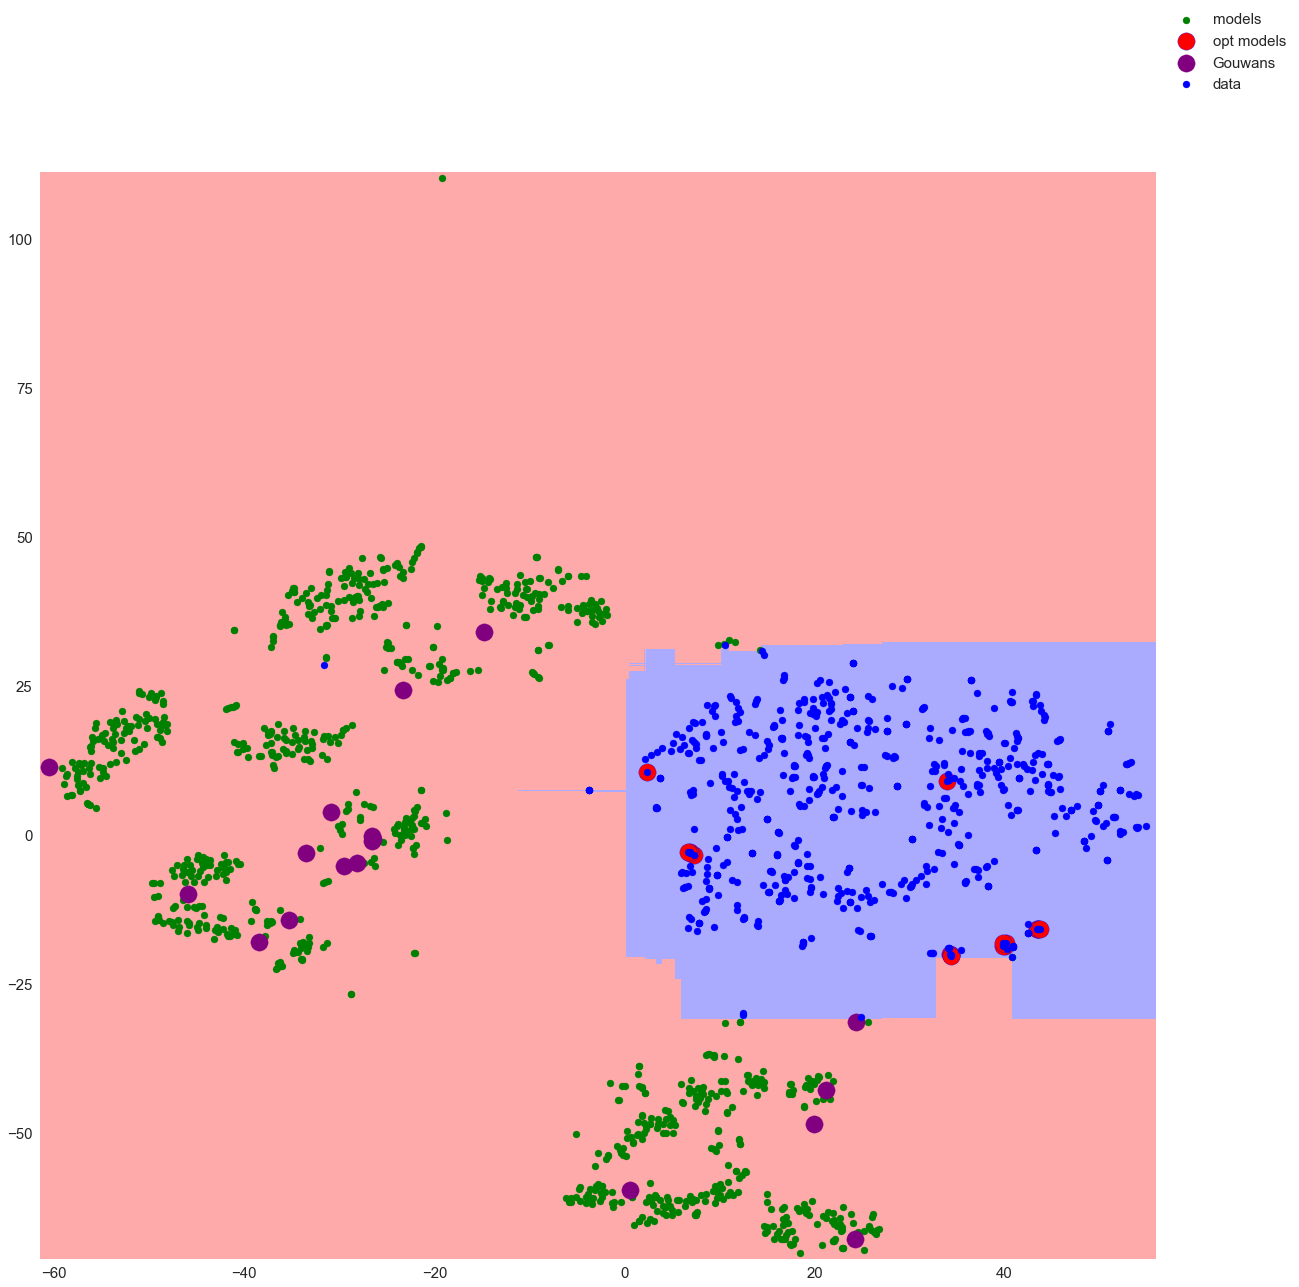

In [72]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
fig = plt.figure(figsize=(20,20))
#ax = plt.subplot(111)

#n_neighbors = 15

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
"""

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[0,model_index_labels],x[1,model_index_labels],c='g',cmap='rainbow',label='models')
plt.scatter(x[0,new_model_labels],x[1,new_model_labels], s=300, c='red',edgecolors='blue',label='opt models')
plt.scatter(x[0,gouwens_idx_labels],x[1,gouwens_idx_labels],s=300,c='purple',cmap='rainbow',label='Gouwans')
plt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
legend = fig.legend()
plt.show()
"""

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

data = []
trace0=(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],'data',experiment_idx)
trace1=(iso[0,model_index_labels],iso[1,model_index_labels],'models',model_idx)
trace2=(iso[0,new_model_labels],iso[1,new_model_labels],'optimized models',new_models_idx)
trace3=(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],'Gouwens models',gouwens_idx)
trace4=(iso[0,markram_idx_labels],iso[1,markram_idx_labels],'Markram models',markram_idx)

trace5=([iso[0,experiment_idx_labels][42]],[iso[1,experiment_idx_labels]],'Layer 4 aspiny 313862167',experiment_idx_labels)
trace6=([iso[0,gouwens_idx_labels][-7]],[iso[1,gouwens_idx_labels][-7]],'Layer 4 spiny 479728896',gouwens_idx_labels)

traces = [trace0,trace1,trace2,trace3,trace4,trace5,trace6]
cnt=0
theme = px.colors.diverging.Portland

for i,ttt in enumerate(traces):
    if cnt==len(theme):
        cnt=0
    if i>1:
        size = 12
    else:
        size = 6
    trace = dict(
        type='scatter',
        text = df[df.index.isin(ttt[3])].index,
        x=ttt[0],
        y=ttt[1],
        mode='markers',
        name=ttt[2],
        marker=dict(
            color=theme[cnt],
            size=size,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)
    cnt+=1



import numpy as np

tracex = go.Heatmap(z=Z,x=xx,y=yy)

data.append(tracex)
fig = go.Figure(
    data=data,
    layout_title_text="steady_state_voltage_stimend_3.0x versus AP1DelayMeanTest_3.0x"
)


fig.show()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
fig = plt.figure(fig_size=(100,100))

#n_neighbors = 15

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[0,new_model_labels],x[1,new_model_labels], s=200, c='red',edgecolors='blue')
plt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(x[0,gouwens_idx_labels],x[1,gouwens_idx_labels],c='purple',cmap='rainbow',label='Gouwans')
try:
    plt.scatter(x[0,experiment_idx_labels][42],x[1,experiment_idx_labels][42],s=7000,c='green', alpha=0.3,cmap='rainbow',label='Real cell Layer 4 aspiny 313862167')
    plt.scatter(x[0,gouwens_idx_labels][-7],x[1,gouwens_idx_labels][-7],s=7000,c='green', alpha=0.3,cmap='rainbow',label='A model layer 4 spiny 479728896')
except:
    pass
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
legend = fig.legend()

plt.show()



* Blue means experimental data, red means model, as machine categorized using Sklearns Random Forest classifier.

A general trend is apparent at the macro scale. It seems as if the bottom 2/3rds of the plane belong to data, and the remaining upper 1/3rd of the plane belongs to models, however you can also see on a micro scale there are lots of small pockets, or islands of model decision territory inside, what is more generally regarded as data territory.

Although the large red dots, appear in the correct side of the macro decision boundary, zooming in would reveal that these optimized models are in fact enveloped by model island that is excatly small enough to contain them. Therefore random forest classification, correctly classifies the optimized models as models.

# The above figure allows us
To argue that the newer optimized models are closer to cluster centres and often fall on the experimental data side of the decision boundary.


In [ ]:
groundtruth
predictions = rfc.predict(X)
print(np.shape(predictions))


In [ ]:
df_combined.tail()

# Lets switch back to using all 38 features to classify
Only as its easier for me to debug, and I can make progress more quickly.
Using cross validation below you can see that this approach is generalizable.

In [ ]:

from sklearn import metrics

In [ ]:
#!pip install --update sklearn
len(groundtruth)
groundtruth
df_combined.head()

In [ ]:
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(df_combined.values, groundtruth, test_size=0.5, random_state=42)    

rfc = RandomForestClassifier()

# All 7 seven new models are classified as data

Ie it is false that they are percieved as models, its true that they are percieved as data.

# This will enable us to use a cross-validation Approach.
Cross-validation will help us to check the generalizability of our model, by better navigating the bias-variance tradeoff.

# Report on misclassification.
Even though RFC can be over-fit by using all the data over 148 features a False negative is still sometimes reported.
Experimental data point with identifier: "482764620" is sometimes falsely classified as a model, but we know from ground truth that it is an experiment.

The outputs of thistest are a bit different each time.

In [ ]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

fig, ax = plt.subplots(2,2)
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

### Repeat above with just experimental data

In [ ]:
# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
experiment_df

In [ ]:
model_df[:] = ss.fit_transform(model_no_trans_df.values);

In [ ]:
model_no_trans_df.head()

In [ ]:
model_df.head()

In [ ]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

df = model_df.copy()

fig, ax = plt.subplots(2,2)
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

In [ ]:
try:
    os.mkdir('data')
except:
    pass
filename = os.path.join(path2data,'new_cortical_ephys.csv')

model_df.to_csv(filename)

filename = os.path.join(path2data,'new_cortical_ephys_no_trans.csv')
model_no_trans_df.to_csv(filename)

filename = os.path.join(path2data,'experiment_ephys_no_trans.csv')
experiment_no_trans_df.to_csv(filename)